# Mood classfication using CNN (HAPPY / SAD)

## 1. Introduction and Objective

### Objective:
- Build a CNN model to classify images as "Happy" or "Sad" based on visual content, using max pooling as part of the network architecture.

#### **Key Components**:
1. **Data Organization**: Images are organized into `Training`, `Testing`, and `Validation` folders, with subfolders `happy` and `not happy` (or equivalent) for binary classification.
2. **Data Preprocessing**: Images are loaded, resized, and augmented using `ImageDataGenerator`.
3. **Model Architecture**: A CNN with convolutional layers, max pooling, and dense layers is built to classify images.
4. **Training**: The model is trained on the training dataset and validated using the validation dataset.
5. **Testing**: The trained model is used to predict the class ("Happy" or "Sad") of images in the testing folder.
6. **Model Saving**: The trained model is saved for future use.


## 2. Libraries Used:
**Libraries Used**:
- `tensorflow.keras.preprocessing.image`: For image loading and preprocessing.
- `matplotlib.pyplot`: For visualizing images.
- `tensorflow`: For building and training the CNN.
- `numpy`: For numerical operations on image arrays.
- `cv2`: For image processing (though not extensively used in the provided code).
- `os`: For interacting with the file system.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [4]:
# img = image.load_img(r"C:\Users\pawar\OneDrive\Pictures\it's me\0709.png")
# plt.imshow(img)
# i1 = cv2.imread(r"C:\Users\pawar\OneDrive\Pictures\it's me\0709.png")
# print(i1)
# print(i1.shape)

#### **Comment:** 
- The comment explains that ImageDataGenerator automatically labels images based on the folder structure, which is a key feature for this project.

**Key Concepts:**
- `ImageDataGenerator` is a powerful tool for handling large image datasets, as it loads images in batches, applies data augmentation (e.g., rotation, flipping), and assigns labels based on directory names.
- TensorFlow/Keras provides a high-level API for building CNNs, making it easier to define, train, and evaluate models.


## 3. Data Loading and Preprocessing:

### What is `ImageDataGenerator`?
- It's a tool from Keras (a deep learning library) that helps prepare image data for training.
- It can:
  - Load images from folders
  - Resize images
  - Apply transformations (like rescaling pixel values)
  - Create batches of images for training

In [5]:
train = ImageDataGenerator(rescale = 1/255)
# ImageDataGenerator(rescale=1/255): Normalizes pixel values from [0,255] to [0,1].


train_dataset = train.flow_from_directory(
    r'C:\Users\pawar\data_science\Deep Learning\19. CNN - Happy  or Sad\Training',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

validation = ImageDataGenerator(rescale=1/255)

validation_dataset = validation.flow_from_directory(
    r'C:\Users\pawar\data_science\Deep Learning\19. CNN - Happy  or Sad\Validation',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

Found 12 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


1. **Training Data Generator**:
```python
train = ImageDataGenerator(rescale = 1/255)
```
- Creates a generator for training data
- `rescale=1/255`: Normalizes pixel values from 0-255 to 0-1 (helps neural network learn better)
2. **Loading Training Images**:
```python
train_dataset = train.flow_from_directory(r'..',target_size=(200, 200), batch_size=3,class_mode='binary')
```
- `flow_from_directory`: Loads images from the specified folder path
- `target_size=(200, 200)`: Resizes all images to 200x200 pixels (makes them uniform)
- `batch_size=3`: Groups images in batches of 3 for training
- `class_mode='binary'`: Since you're doing happy/sad classification (2 classes), it's binary


## 4. Data Exploration

1. **Checking a Batch from Validation Dataset**

In [8]:
batch = next(validation_dataset)
print(len(batch[0]))  # should print 3 (batch_size)


2


`next(validation_dataset): Retrieves the next batch of data (images and labels).`

2. **Checking Class Indices**

In [115]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

- **Purpose**: Shows the mapping of class names (subdirectory names) to numerical labels.
  - For example, if the `Training` directory has subfolders `happy` and `not_happy`, this might return:
    ```python
    {'happy': 0, 'not_happy': 1}
    ```
  - This tells you how the classes are encoded (e.g., `happy` is labeled `0`, `not_happy` is `1`).


3. **Checking Class Labels for All Samples**

In [116]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

- **Purpose**: Returns a list of all labels in the dataset (in order of the files). Each label is an integer corresponding to `class_indices`.
  - For example, if there are 12 images (6 Happy, 6 Sad), this might return:
    ```python
    array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    ```

## 5. CNN Model Architecture:

```This is a convolutional neural network (CNN) model for binary image classification (Happy/Sad) built using TensorFlow/Keras.```

In [9]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\pawar\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`1. Input Layer`
- **Implicitly defined** by the `input_shape=(200,200,3)` parameter in the first Conv2D layer
- Accepts color images of size 200×200 pixels with 3 channels (RGB)

`2. Convolutional Layers`
- **First Conv2D Layer**
```python
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3))
```
- **16 filters** (feature detectors) of size 3×3
- ReLU activation introduces non-linearity (output = max(0, input))
- Input shape: (200, 200, 3) (height, width, channels)
- Output shape: (198, 198, 16) (slightly smaller due to 3×3 convolution without padding)

`3. Flatten Layer`
```python
tf.keras.layers.Flatten()
```
- Converts 3D feature maps (23,23,64) into 1D vector
- Output shape: (23 × 23 × 64) = 33,856 elements

`4. Dense (Fully Connected) Layers`
- **First Dense Layer**
```python
tf.keras.layers.Dense(512, activation='relu')
```
- 512 neurons with ReLU activation

## 6. Model Compilation:

In [118]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
              )


- `Loss Function:` binary_crossentropy, which is standard for binary classification. It measures the difference between predicted probabilities and true labels.
- `Optimizer:` RMSprop with a learning rate of 0.001. RMSprop is an adaptive learning rate optimizer suitable for deep learning tasks.
- `Metrics:` accuracy, which tracks the percentage of correctly classified images during training and validation.

## 7. Code: Training the Model

In [119]:
model_fit = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - accuracy: 0.5556 - loss: 13.7932 - val_accuracy: 0.5000 - val_loss: 1.3273
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.2111 - loss: 1.4249 - val_accuracy: 1.0000 - val_loss: 0.4643
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.7333 - loss: 0.5426 - val_accuracy: 1.0000 - val_loss: 0.2457
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.8556 - loss: 0.4066 - val_accuracy: 1.0000 - val_loss: 0.2040
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9667 - loss: 0.2340 - val_accuracy: 0.5000 - val_loss: 1.1978
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.5778 - loss: 0.7295 - val_accuracy: 1.0000 - val_loss: 0.1510
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 1.0000 - loss: 0.1163 - val_accuracy: 1.0000 - val_loss: 0.0947
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 0.1143 - val_accuracy: 1.0000 - val_loss

- **Purpose**: Trains the model on the training dataset and evaluates it on the validation dataset.
- **Details**:
  - `train_dataset`: Provides batches of training images and labels.
  - `epochs=10`: Trains the model for 10 iterations over the entire training dataset.
  - `validation_data=validation_dataset`: Evaluates the model on the validation dataset after each epoch.
  - **Output**: Shows training progress for each epoch, including:
    - `accuracy`: Training accuracy.
    - `loss`: Training loss.
    - `val_accuracy`: Validation accuracy.
    - `val_loss`: Validation loss.
  - Example output for Epoch 10: `accuracy: 1.0000 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 0.0080`.

## 8. Testing the Model:

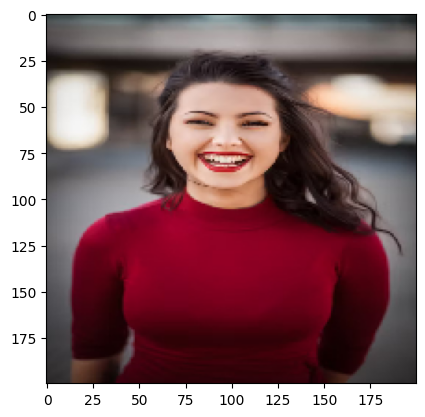

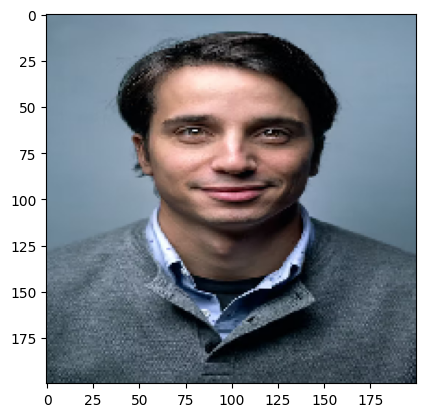

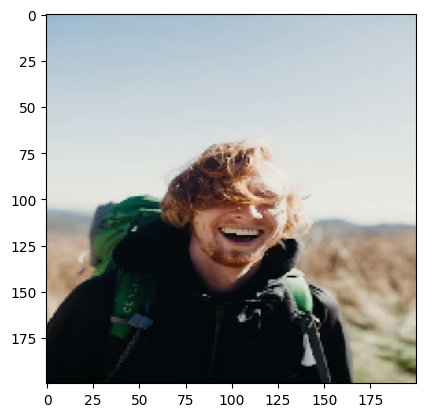

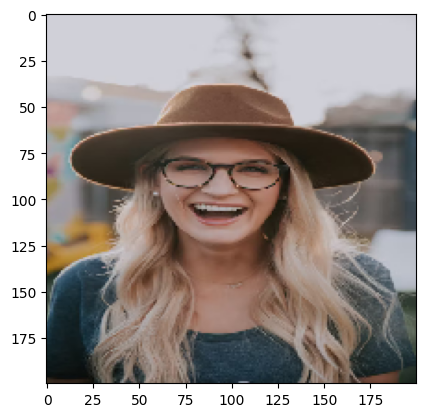

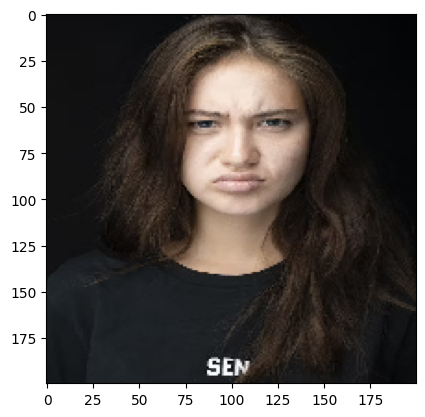

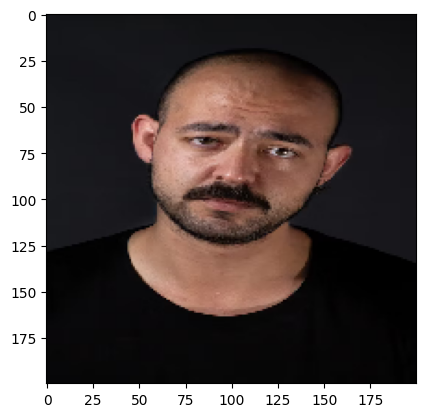

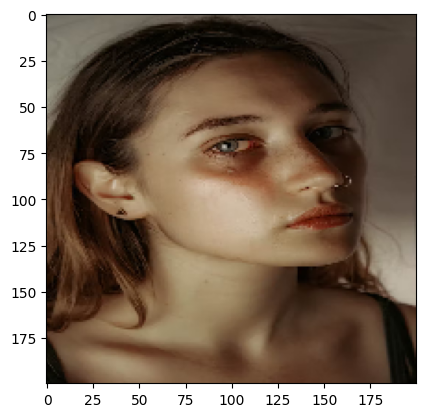

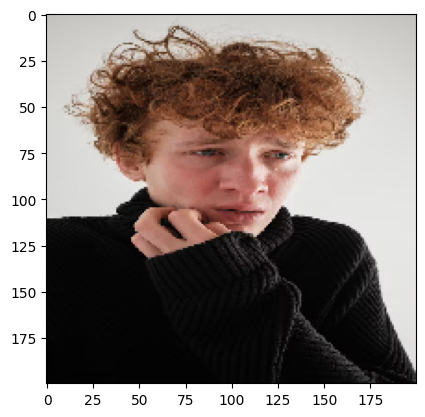

In [ ]:
# dir_path = r'C:\Users\pawar\data_science\Deep Learning\19. CNN - Happy  or Sad\Testing'
# for i in os.listdir(dir_path ):
#     print(i)
dir_path = r'C:\Users\pawar\data_science\Deep Learning\19. CNN - Happy  or Sad\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

- `Purpose: Lists the filenames of images in the Testing directory.`

    - Lists test images in the Testing directory

    - Prepares to make predictions (commented out visualization code)

## 9. Testing the Model

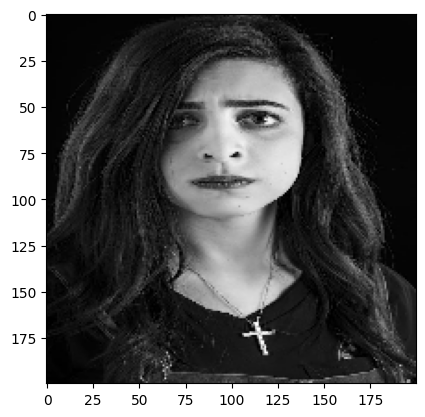

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am  not happy


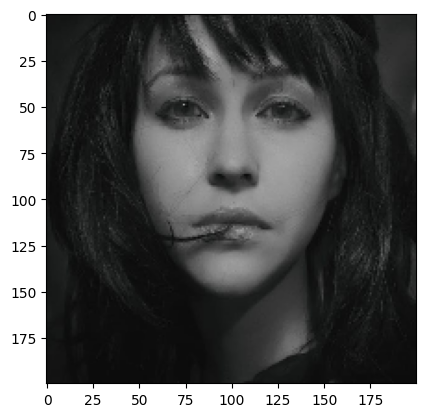

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i am  not happy


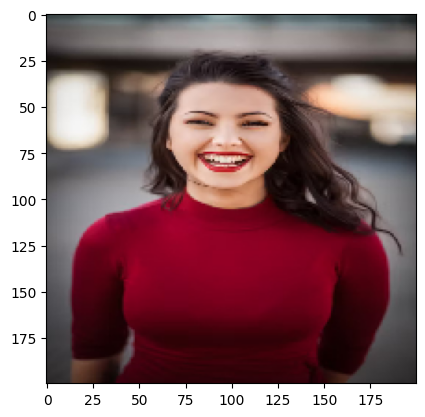

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i am  not happy


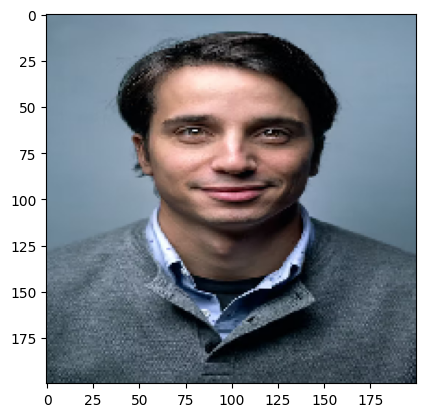

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i am  not happy


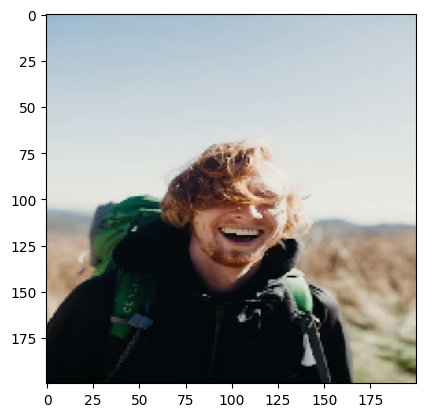

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
i am  not happy


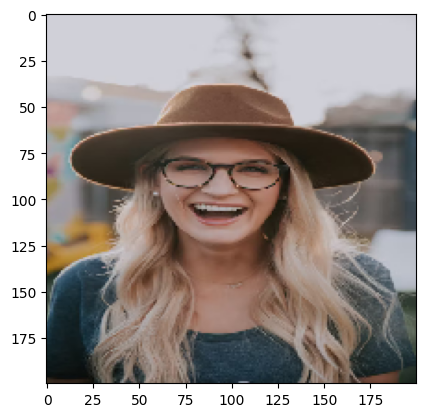

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
i am  not happy


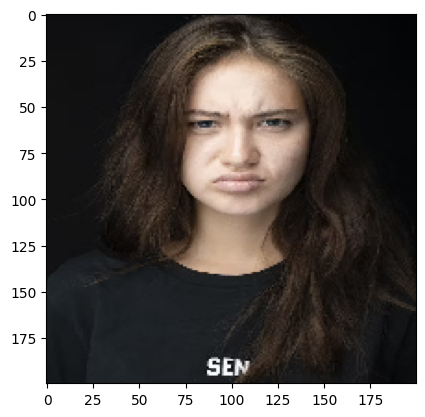

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
i am  not happy


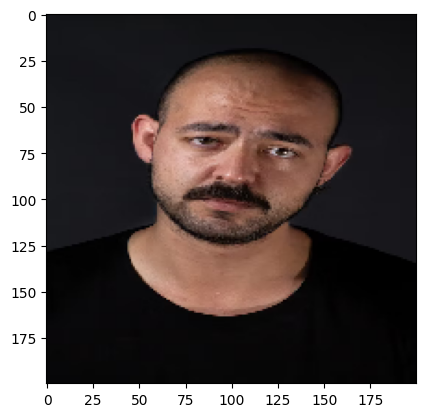

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i am  not happy


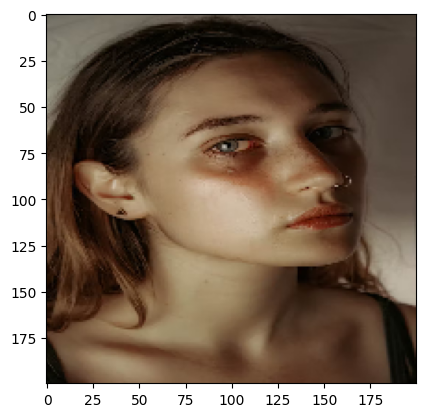

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i am  not happy


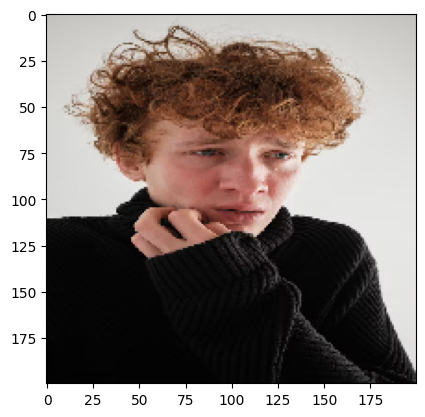

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
i am  not happy


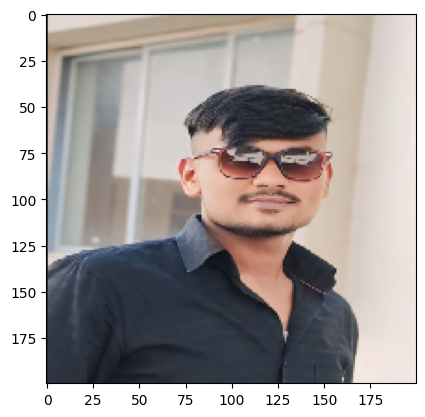

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am  not happy


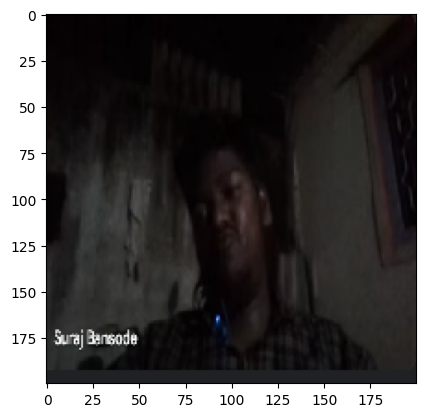

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i am  not happy


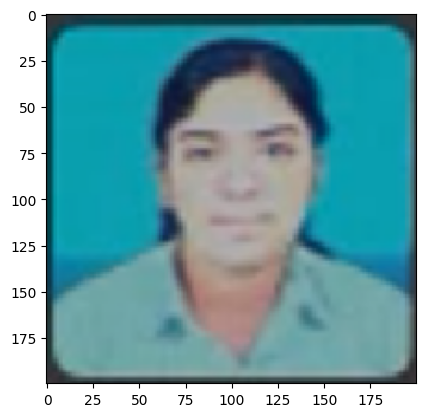

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
i am  not happy


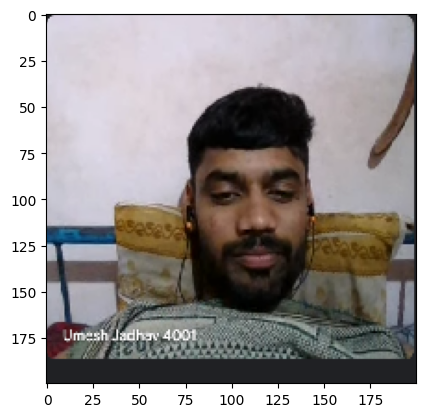

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am  not happy


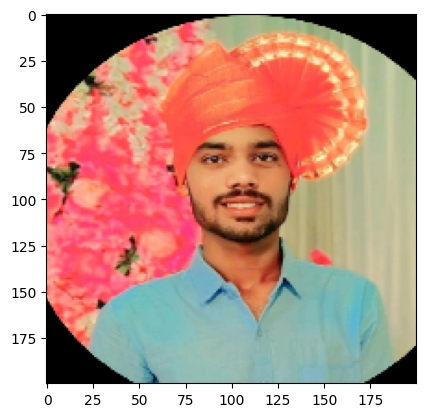

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
i am  not happy


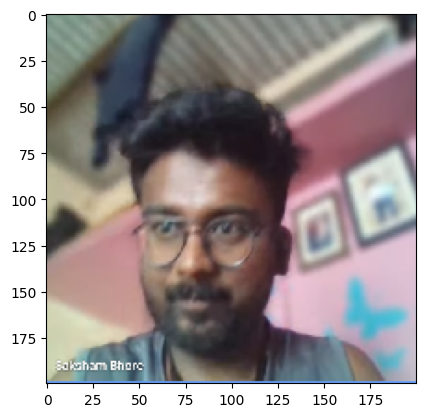

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i am  not happy


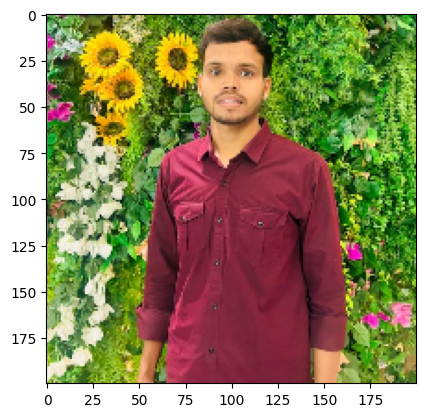

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
i am  not happy


In [21]:
dir_path = r'C:\Users\pawar\data_science\Deep Learning\19. CNN - Happy  or Sad\Testing'
#Specifies the path to the directory containing test images.
for i in os.listdir(dir_path ): 
# Loops through each file in the Testing directory.
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

# ---
    x= image.img_to_array(img)
    # Converts the PIL image to a NumPy array for model input.
    x=np.expand_dims(x,axis = 0)
    #np.expand_dims(x, axis=0) adds a new axis at index 0,
    #  changing the shape from (200, 200, 3) to (1, 200, 200, 3).
    images = np.vstack([x])
    #np.vstack([x]) stacks arrays in a vertical sequence.

    val = model.predict(images)
    # model.predict(images): Feeds the preprocessed image_ _ _ 
    # _ _ _(shape: (1, 200, 200, 3)) to the model, which outputs a prediction.
    if val == 0:
        print( ' i am happy')
    else:
        print('i am  not happy')
    

## 10. Saving the Model

In [130]:
# Save the trained model to a .h5 file
model.save('happy_sad_model.h5')


means that you are **saving a trained Keras model** (usually from TensorFlow) to a file named `'happy_sad_model.h5'`.

### Explanation:

* `model` – This is your trained neural network model (created using Keras).
* `.save()` – This method saves:
  * the model's **architecture** (layers and structure),
  * the model's **weights** (learned parameters),
  * the **training configuration** (loss, optimizer, metrics),
  * and the **optimizer state** (so training can resume from the same point).
* `'happy_sad_model.h5'` – This is the filename you are saving to. The `.h5` extension refers to **HDF5** (Hierarchical Data Format), a popular format for storing large amounts of data.